In [126]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import logit, probit, glm
import pandas as pd
import seaborn as sns

In [127]:
df = pd.read_excel("data_raket.xlsx")
df = df.rename(columns={'test':'test', 'doel snelheid (in knopen)':'doel', 'resultaat (0=mis 1=raak)':'resultaat'}).copy()
df.head()

,test,doel,resultaat,laag,hoog
0,1,400,0,0.087783,0.584570
1,2,210,1,0.621714,0.985459
2,3,490,0,0.008746,0.389691
3,4,220,1,0.602198,0.981017
4,5,500,0,0.006627,0.372296


In [128]:
df = df.sort_values(by='doel')

In [129]:
model = logit("resultaat ~ doel", data=df).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.410194
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              resultaat   No. Observations:                   25
Model:                          Logit   Df Residuals:                       23
Method:                           MLE   Df Model:                            1
Date:                Sat, 15 Apr 2023   Pseudo R-squ.:                  0.4075
Time:                        17:29:25   Log-Likelihood:                -10.255
converged:                       True   LL-Null:                       -17.309
Covariance Type:            nonrobust   LLR p-value:                 0.0001726
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0660      2.116      2.867      0.004       1.919      10.213
doel          -0.0177      0.006     -2.908      0.004      -0.030      -0.006
==============================================================================
"""

In [130]:
linmodel_f = lambda x: model.params.values[0] + x*model.params.values[1]

In [131]:
b = model.params.values[0]
b + 1.96*2.116

10.213342829330536

In [132]:
b_min = 1.919
b_max = 10.213

a_min = -0.030
a_max = -0.006

In [139]:
lower_f = lambda x: b_min + x*a_min
upper_f = lambda x: b_max + x*a_max

In [135]:
snelheid = np.linspace(min(df.doel), max(df.doel), 100)

In [136]:
linmodel = linmodel_f(snelheid)
lower = lower_f(snelheid)
upper = upper_f(snelheid)

In [142]:
std_low = linmodel-lower
std_up = linmodel-upper

std_low, std_up

(array([ 1.81412901,  1.77878274,  1.74343647,  1.7080902 ,  1.67274393,
         1.63739766,  1.60205139,  1.56670512,  1.53135885,  1.49601258,
         1.46066631,  1.42532004,  1.38997377,  1.3546275 ,  1.31928123,
         1.28393496,  1.24858869,  1.21324242,  1.17789615,  1.14254988,
         1.10720361,  1.07185734,  1.03651107,  1.0011648 ,  0.96581853,
         0.93047226,  0.89512599,  0.85977972,  0.82443345,  0.78908718,
         0.75374091,  0.71839464,  0.68304837,  0.6477021 ,  0.61235583,
         0.57700956,  0.54166329,  0.50631702,  0.47097075,  0.43562448,
         0.40027821,  0.36493194,  0.32958567,  0.2942394 ,  0.25889313,
         0.22354686,  0.18820059,  0.15285432,  0.11750805,  0.08216178,
         0.04681551,  0.01146924, -0.02387703, -0.0592233 , -0.09456957,
        -0.12991584, -0.16526211, -0.20060838, -0.23595465, -0.27130092,
        -0.30664719, -0.34199346, -0.37733973, -0.412686  , -0.44803227,
        -0.48337854, -0.51872481, -0.55407108, -0.5

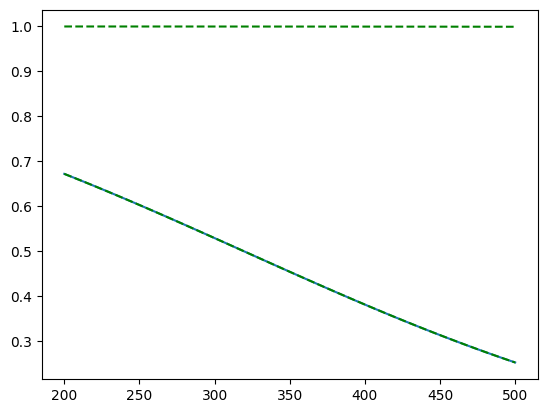

In [137]:
plt.plot(snelheid, 1/(1+np.exp(-lower)))
plt.plot(snelheid, 1/(1+np.exp(-lower)), 'g--')
plt.plot(snelheid, 1/(1+np.exp(-upper)), 'g--')

In [138]:
lower

array([ 0.719     ,  0.70081818,  0.68263636,  0.66445455,  0.64627273,
        0.62809091,  0.60990909,  0.59172727,  0.57354545,  0.55536364,
        0.53718182,  0.519     ,  0.50081818,  0.48263636,  0.46445455,
        0.44627273,  0.42809091,  0.40990909,  0.39172727,  0.37354545,
        0.35536364,  0.33718182,  0.319     ,  0.30081818,  0.28263636,
        0.26445455,  0.24627273,  0.22809091,  0.20990909,  0.19172727,
        0.17354545,  0.15536364,  0.13718182,  0.119     ,  0.10081818,
        0.08263636,  0.06445455,  0.04627273,  0.02809091,  0.00990909,
       -0.00827273, -0.02645455, -0.04463636, -0.06281818, -0.081     ,
       -0.09918182, -0.11736364, -0.13554545, -0.15372727, -0.17190909,
       -0.19009091, -0.20827273, -0.22645455, -0.24463636, -0.26281818,
       -0.281     , -0.29918182, -0.31736364, -0.33554545, -0.35372727,
       -0.37190909, -0.39009091, -0.40827273, -0.42645455, -0.44463636,
       -0.46281818, -0.481     , -0.49918182, -0.51736364, -0.53